Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

Loading Given Datasets

In [2]:
customers_url = "https://drive.google.com/uc?id=1bu_--mo79VdUG9oin4ybfFGRUSXAe-WE"
transactions_url = "https://drive.google.com/uc?id=1saEqdbBB-vuk2hxoAf4TzDEsykdKlzbF"

customers = pd.read_csv(customers_url)
transactions = pd.read_csv(transactions_url)

Merging Datasets to get complete data in one set.

In [3]:
data = pd.merge(transactions, customers, on='CustomerID')

Aggregate transaction data for each customer

In [4]:
customer_transactions = data.groupby('CustomerID').agg({
    'Quantity': 'sum',
    'TotalValue': 'sum'
}).reset_index()


Merge with customer profile information

In [5]:
customer_data = pd.merge(customer_transactions, customers, on='CustomerID')

Feature selection for clustering

In [6]:
features = customer_data[['Quantity', 'TotalValue']]

Normalize the data

In [7]:
scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)

Clustering the data using K-Means

In [9]:
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(normalized_features)

# Add cluster labels to the dataframe
customer_data['Cluster'] = clusters

Calculate Davies-Bouldin Index

In [10]:
db_index = davies_bouldin_score(normalized_features, clusters)
print(f"Davies-Bouldin Index: {db_index}")

Davies-Bouldin Index: 0.7578966005288539


Visualize the clusters

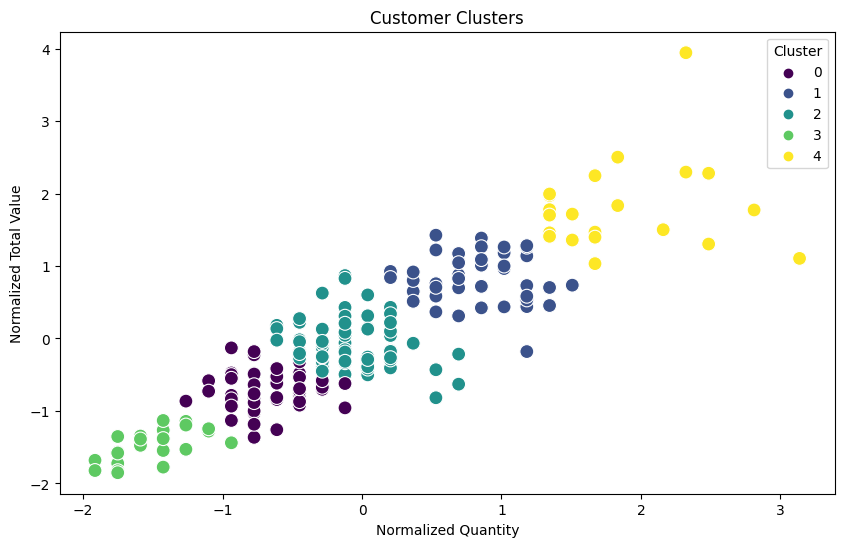

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=normalized_features[:, 0],
    y=normalized_features[:, 1],
    hue=clusters,
    palette='viridis',
    s=100
)
plt.title('Customer Clusters')
plt.xlabel('Normalized Quantity')
plt.ylabel('Normalized Total Value')
plt.legend(title='Cluster')
plt.show()

Save the clustering results

In [13]:
customer_data.to_csv('Somu_Likitha_Clustering.csv', index=False)